In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [ ]:
import numpy as np
import mcdc
from c5g7_2d_model import model, ZERO
import shutil

mcdc = model()
ZERO = 1e-3

# =============================================================================
# iQMC Parameters
# =============================================================================
pitch = 1.26
N = 100
Nx = 17 * 3 * 2
Ny = 17 * 3 * 2
G = 7
x_grid = np.linspace(ZERO, pitch * 17 * 3, Nx + 1)
y_grid = np.linspace(-pitch * 17 * 3, -ZERO, Ny + 1)

phi0 = np.ones((G, Nx, Ny))

mcdc.iQMC(
    x=x_grid,
    y=y_grid,
    maxit=150,
    g=np.ones(G),
    phi0=phi0,
    mode='batched',
    sample_method='halton'
    # scores=['source-x', 'source-y']
)

# =============================================================================
# run mcdc
# =============================================================================

# Setting
mcdc.setting(N_particle=N)
mcdc.eigenmode(N_inactive=0, N_active=150)
# Run
mcdc.run()

In [2]:
k_ref = 1.16

In [3]:
# import results
with h5py.File('1_results/constant/N=5000.h5', 'r')as file:
    print(file.keys())
    k_cycle_1 = file['k_cycle'][:]
    print(f"runtime {file['runtime']['total'][()]/60} minutes")
    file.close()

with h5py.File('1_results/constant/N=10000.h5', 'r')as file:
    print(file.keys())
    k_cycle_2 = file['k_cycle'][:]
    print(f"runtime {file['runtime']['total'][()]/60} minutes")
    file.close()

with h5py.File('1_results/constant/N=20000.h5', 'r')as file:
    print(file.keys())
    k_cycle_3 = file['k_cycle'][:]
    print(f"runtime {file['runtime']['total'][()]/60} minutes")
    file.close()

<KeysViewHDF5 ['input_deck', 'iqmc', 'k_cycle', 'k_eff', 'k_mean', 'k_sdev', 'runtime', 'tally']>
runtime [4.53890319] minutes
<KeysViewHDF5 ['input_deck', 'iqmc', 'k_cycle', 'k_eff', 'k_mean', 'k_sdev', 'runtime', 'tally']>
runtime [12.42819101] minutes
<KeysViewHDF5 ['input_deck', 'iqmc', 'k_cycle', 'k_eff', 'k_mean', 'k_sdev', 'runtime', 'tally']>
runtime [11.96578494] minutes


(-0.1, 1.35)

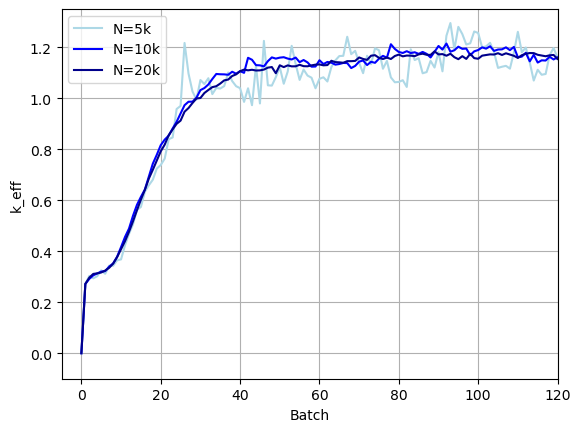

In [5]:
# running eigenvalue plot
batches = range(k_cycle_1.size)

plt.figure()
plt.plot(batches, k_cycle_1, label=f'N=5k', color='lightblue')
plt.plot(batches, k_cycle_2, label=f'N=10k', color='blue')
plt.plot(batches, k_cycle_3, label=f'N=20k', color='darkblue')
plt.xlabel('Batch')
plt.ylabel('k_eff')
plt.grid()
plt.legend()
plt.xlim(-5, 120)
plt.ylim(-0.1, 1.35)